In [13]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [14]:
# Read in dataset
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [15]:
# shape of dataset
print('Data type: ', type(df))
print('Data dims: ', df.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (1025, 14)


In [16]:
# data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


By performing some quick observations on the dataset, we were able to deduce the following:
* There are `14` features and `1025` observations in the dataset.
* The response variable seems to be `target`, while the remaining 13 features are most likely predictors.
* There is only `1` feature identified as `float64` by default, while the rest are `int64`. They all appear to be `Numeric` variables.
* At first glance, no features contain null or N/A observations. However, more data exploration will have to be performed to confirm this.

The description of the dataset, as provided by the UCI Machine Learning Repository and Kaggle, is as follows:

> 1. `age`: age in years
> 2. `sex`: sex
    * 0: female
    * 1: male
> 3. `cp`: chest pain type
    * 0: asymptomatic
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
> 4. `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
> 5. `chol`: serum cholestoral in mg/dl
> 6. `fbs`: (fasting blood sugar > 120 mg/dl)
    * 1: true
    * 0: false
> 7. `restecg`: resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
> 8. `thalach`: maximum heart rate achieved
> 9. `exang`: exercise induced angina
    * 1: yes
    * 0: no
> 10. `oldpeak`: ST depression induced by exercise relative to rest
> 11. `slope`: the slope of the peak exercise ST segment
    * 1: upsloping
    * 2: flat
    * 3: downsloping
> 12. `ca`: number of major vessels (0-3) colored by flourosopy
> 13. `thal`: 1 = normal; 2 = fixed defect; 3 = reversable defect
> 14. `target`: diagnosis of heart disease (angiographic disease status)
    * 0: < 50% diameter narrowing
    * 1: > 50% diameter narrowing

From this description and our observations on the dataset, we can then deduce the following about the features:
* The predictors `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal` and the response variable `target` are <b>nominal categorical variables</b>, where categories are represented by numeric indicators. They will be treated as if they were categorical variables.
* The predictors `age`, `trestbps`, `chol`, `thalach` and `oldpeak` are <b>continuous numeric variables</b>, measured over a range of values.

In [17]:
cat_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
cont_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We will rename the columns so that the analysis is more intuitive.

In [20]:
dict1 = {'sex': {0: 'Female', 1: 'Male'}, 
        'cp': {0: 'Asymptomatic', 1: 'Typical', 2: 'Atypical', 3: 'Non-Anginal'}, 
        'fbs': {0: 'False', 1: 'True'}, 
        'restecg': {0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Probable/Definite LVH'},
        'exang': {0: 'No', 1: 'Yes'},
        'slope': {1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}, 
        'ca': {0: 0, 1: 1, 2: 2, 3: 3},
        'thal': {1: 'Normal', 2: 'Fixed', 3: 'Reversible'}}

# create temporary dataframe for EDA
df_new = df.copy()
for i in dict1:
    df_new = df_new.replace({i: dict1[i]})

In [21]:
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Asymptomatic,125,212,False,ST-T Wave Abnormality,168,No,1.0,Flat,2,Reversible,0
1,53,Male,Asymptomatic,140,203,True,Normal,155,Yes,3.1,0,0,Reversible,0
2,70,Male,Asymptomatic,145,174,False,ST-T Wave Abnormality,125,Yes,2.6,0,0,Reversible,0
3,61,Male,Asymptomatic,148,203,False,ST-T Wave Abnormality,161,No,0.0,Flat,1,Reversible,0
4,62,Female,Asymptomatic,138,294,True,ST-T Wave Abnormality,106,No,1.9,Upsloping,3,Fixed,0


<h2>Exploratory Data Analysis</h2>

<h3>Univariate Analysis</h3>

<h4>Target Variable</h4>

Univariate analysis on the response variable `target`.

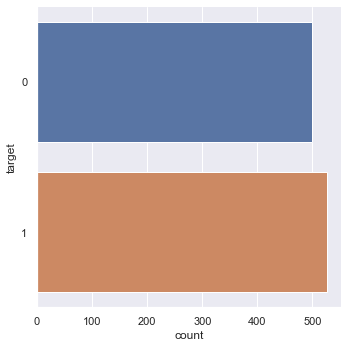

In [22]:
sb.catplot(data = df_new, y='target', kind='count')

In [23]:
countHD, countNHD = df_new['target'].value_counts()
print('% w/ Heart Disease: {:.0%}'.format(countHD/(countHD+countNHD)))
print('% w/o Heart Disease: {:.0%}'.format(countNHD/(countHD+countNHD)))

% w/ Heart Disease: 51%
% w/o Heart Disease: 49%


We see that the response variable `target` is well-balanced. Since there is virtually no class imbalance, there is no need to resample the data to balance the classes.

<h4>Continuous Variables</h4>

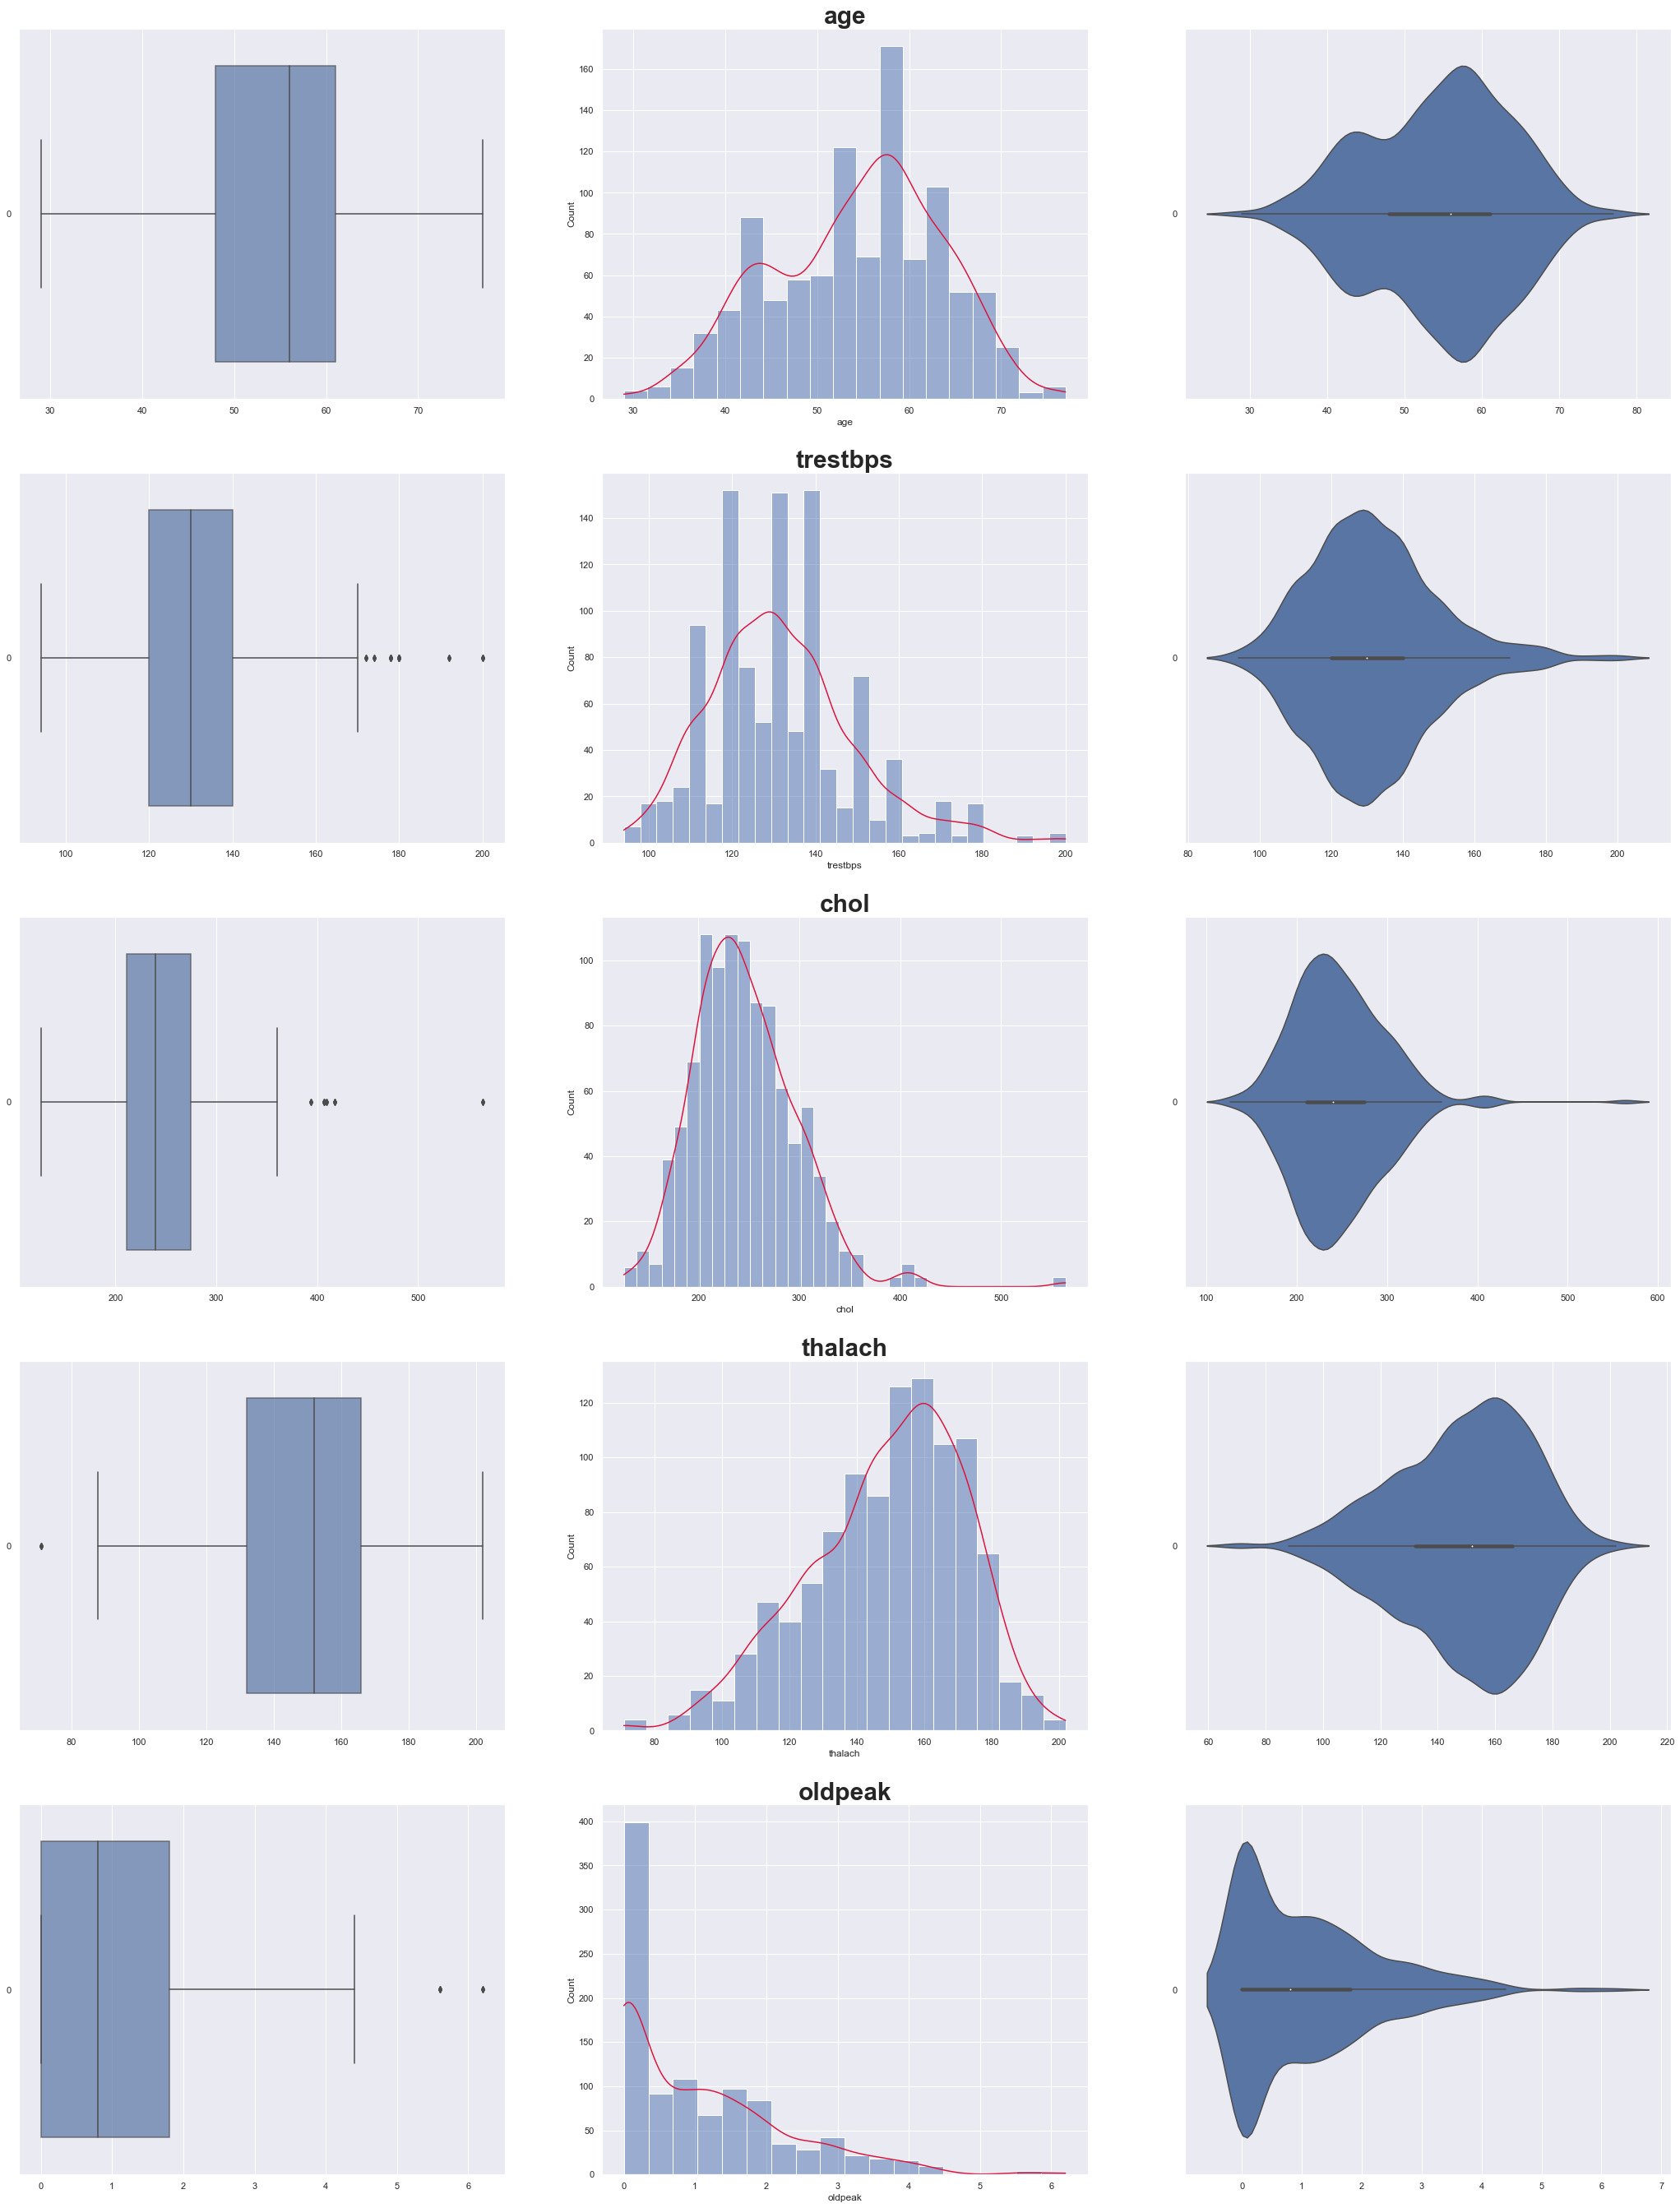

In [24]:
f, axes = plt.subplots(5, 3, figsize=(36, 48))

count = 0
for feature in cont_list:
    sb.boxplot(data = df_new[feature], orient='h', ax=axes[count,0], boxprops=dict(alpha=.7))
    g = sb.histplot(data=df_new[feature], ax=axes[count,1], kde=True)
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    g.lines[0].set_color('crimson')
    sb.violinplot(data=df_new[feature], orient='h', ax=axes[count,2])
    count+=1

<h4>Categorical Variables</h4>

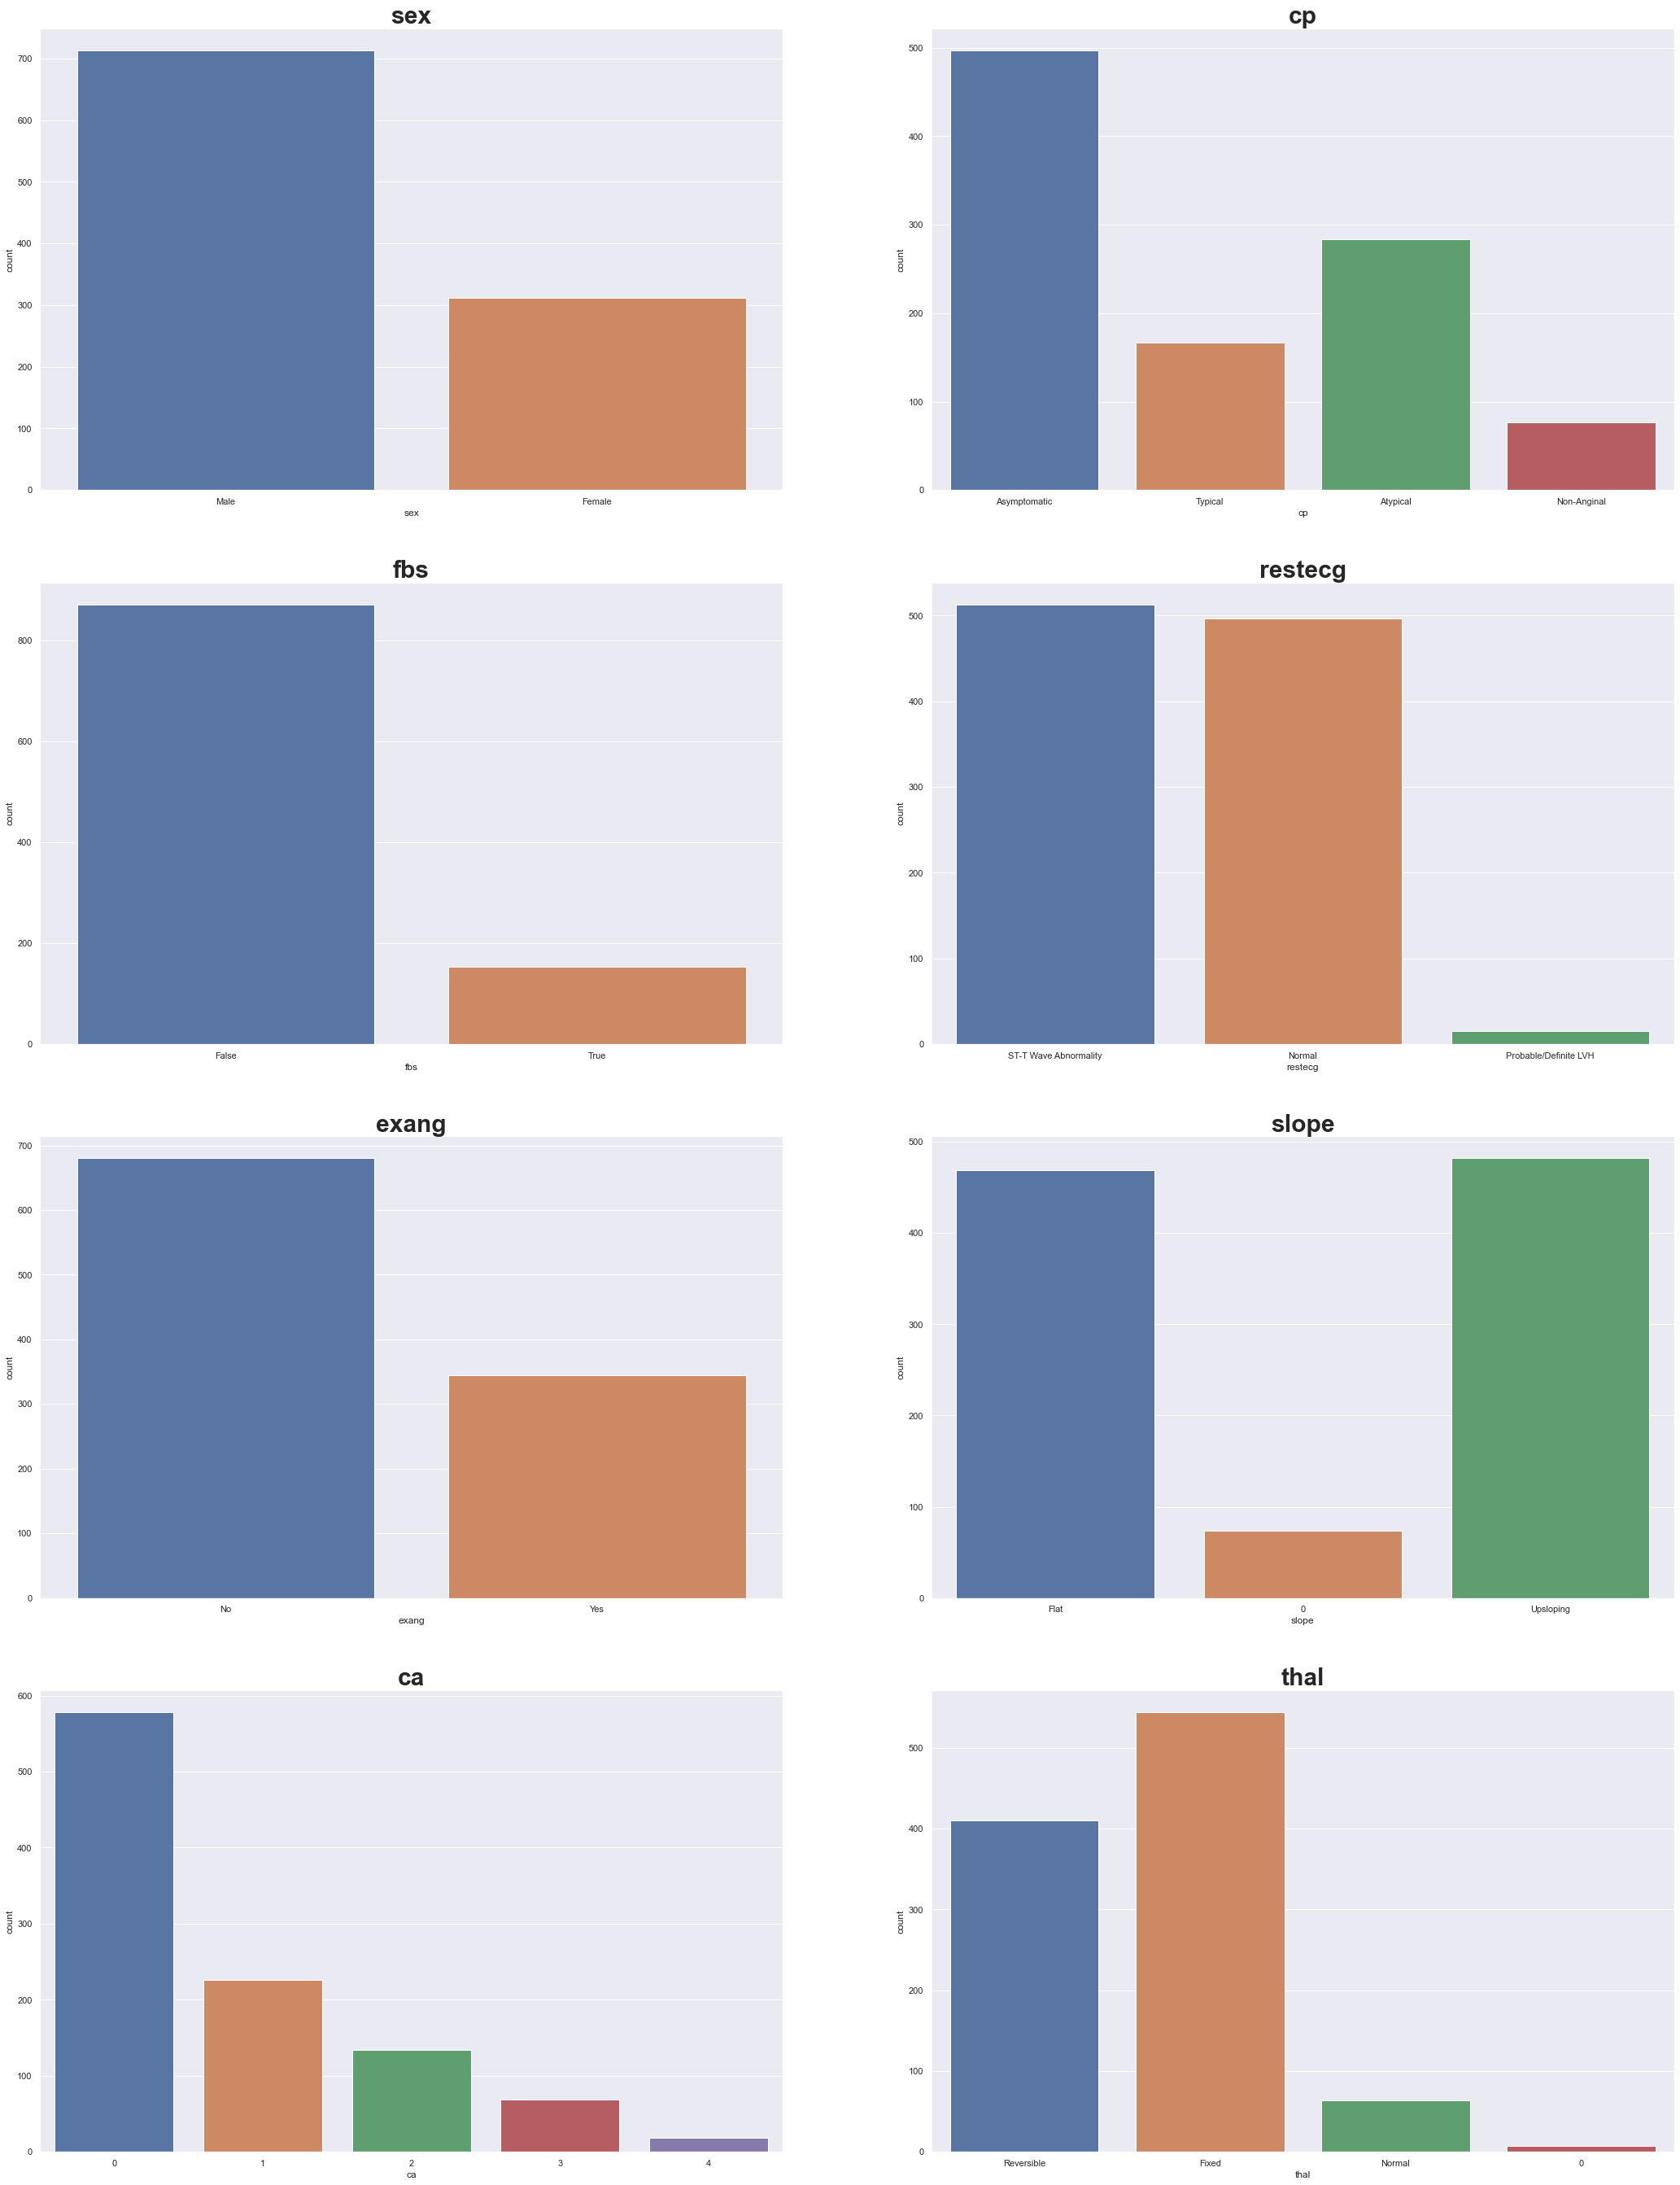

In [25]:
f, axes = plt.subplots(4, 2, figsize=(36, 48))

h = v = 0
for feature in cat_list:
    if feature == 'target': break;
    if h == 2: 
        h = 0 
        v += 1
    g = sb.countplot(data=df_new, x=feature, ax=axes[v,h])
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    h+=1

<h3>Bivariate / Multivariate Analysis</h3>

Now we will explore the relationships between the predictors and the response variable. In addition, we will check for correlative properties between predictors.

<h4>Continuous Variables against Response</h4>

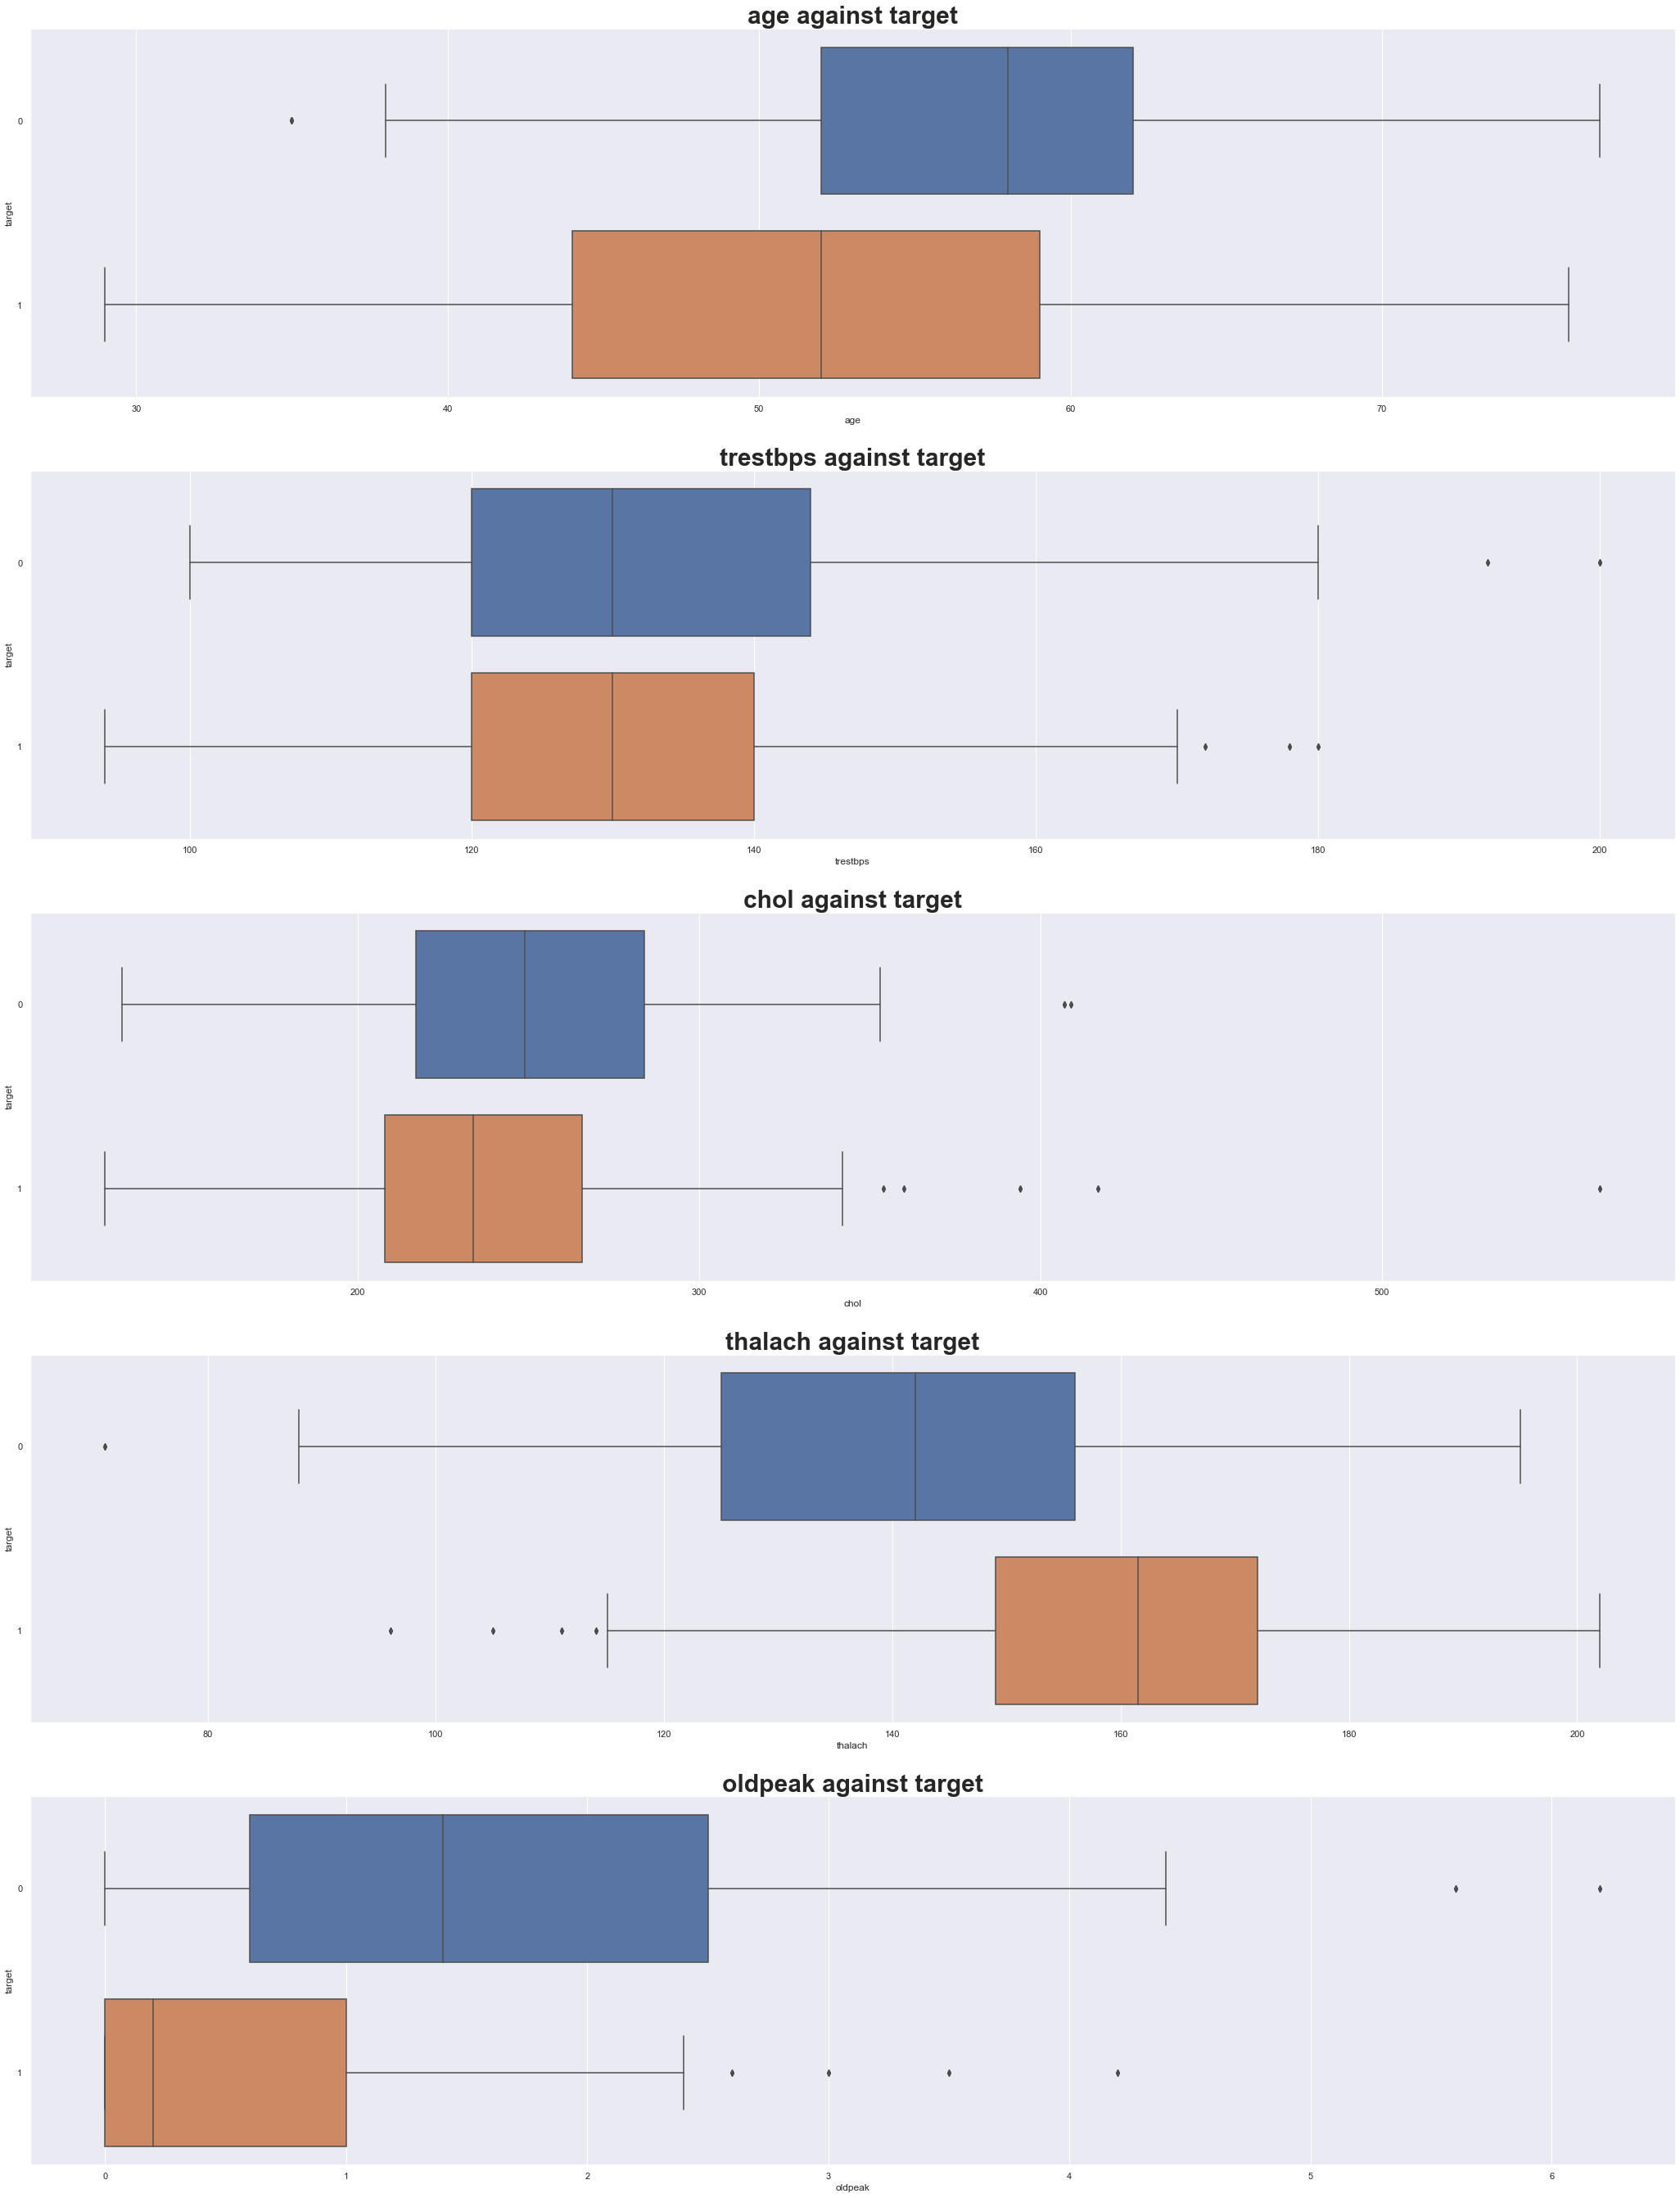

In [26]:
f, axes = plt.subplots(len(cont_list), 1, figsize=(36,48))

count = 0
for feature in cont_list:
    g1 = sb.boxplot(data=df_new, x=feature, y='target', orient='h', ax=axes[count])
    title = feature + ' against target'
    g1.set_title(title, fontdict={'fontsize':30, 'fontweight':'bold'})
    count += 1

<h4>Categorical Variables against Response</h4>

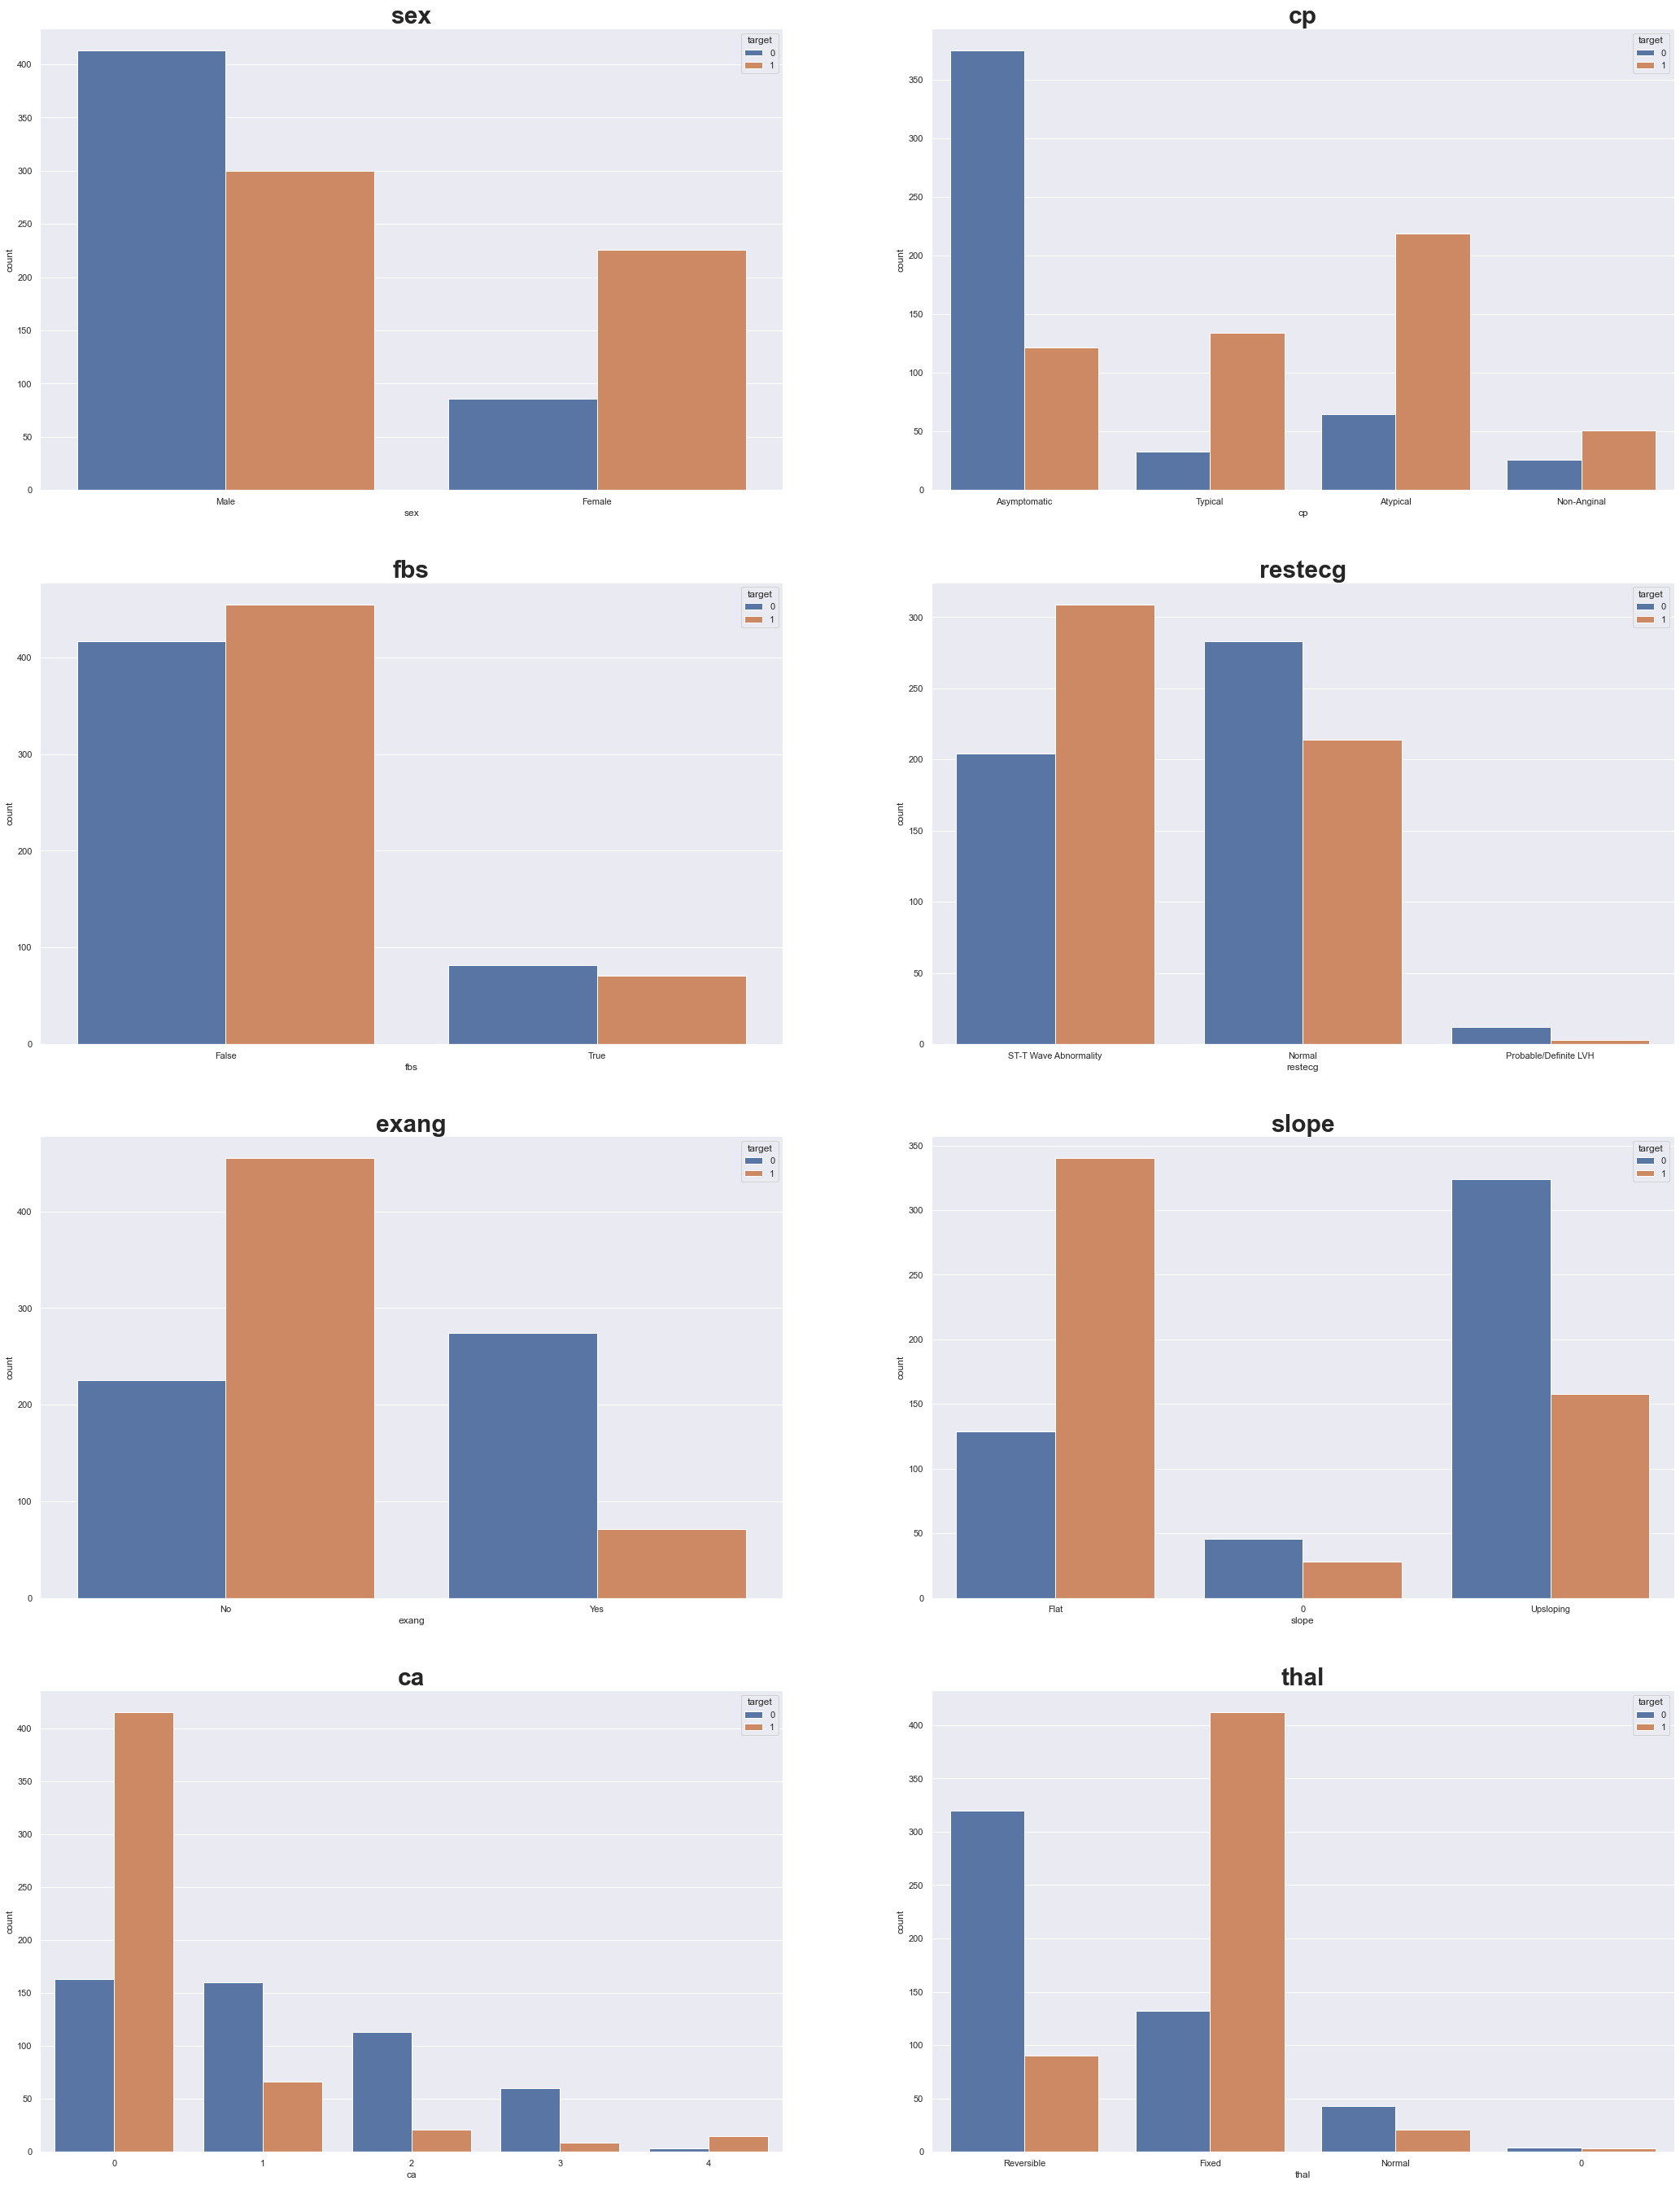

In [27]:
f, axes = plt.subplots(4, 2, figsize=(36, 48))

h = v = 0
for feature in cat_list:
    if feature == 'target': break;
    if h == 2: 
        h = 0 
        v += 1
    g = sb.countplot(data=df_new, x=feature, hue='target', ax=axes[v,h])
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    h+=1

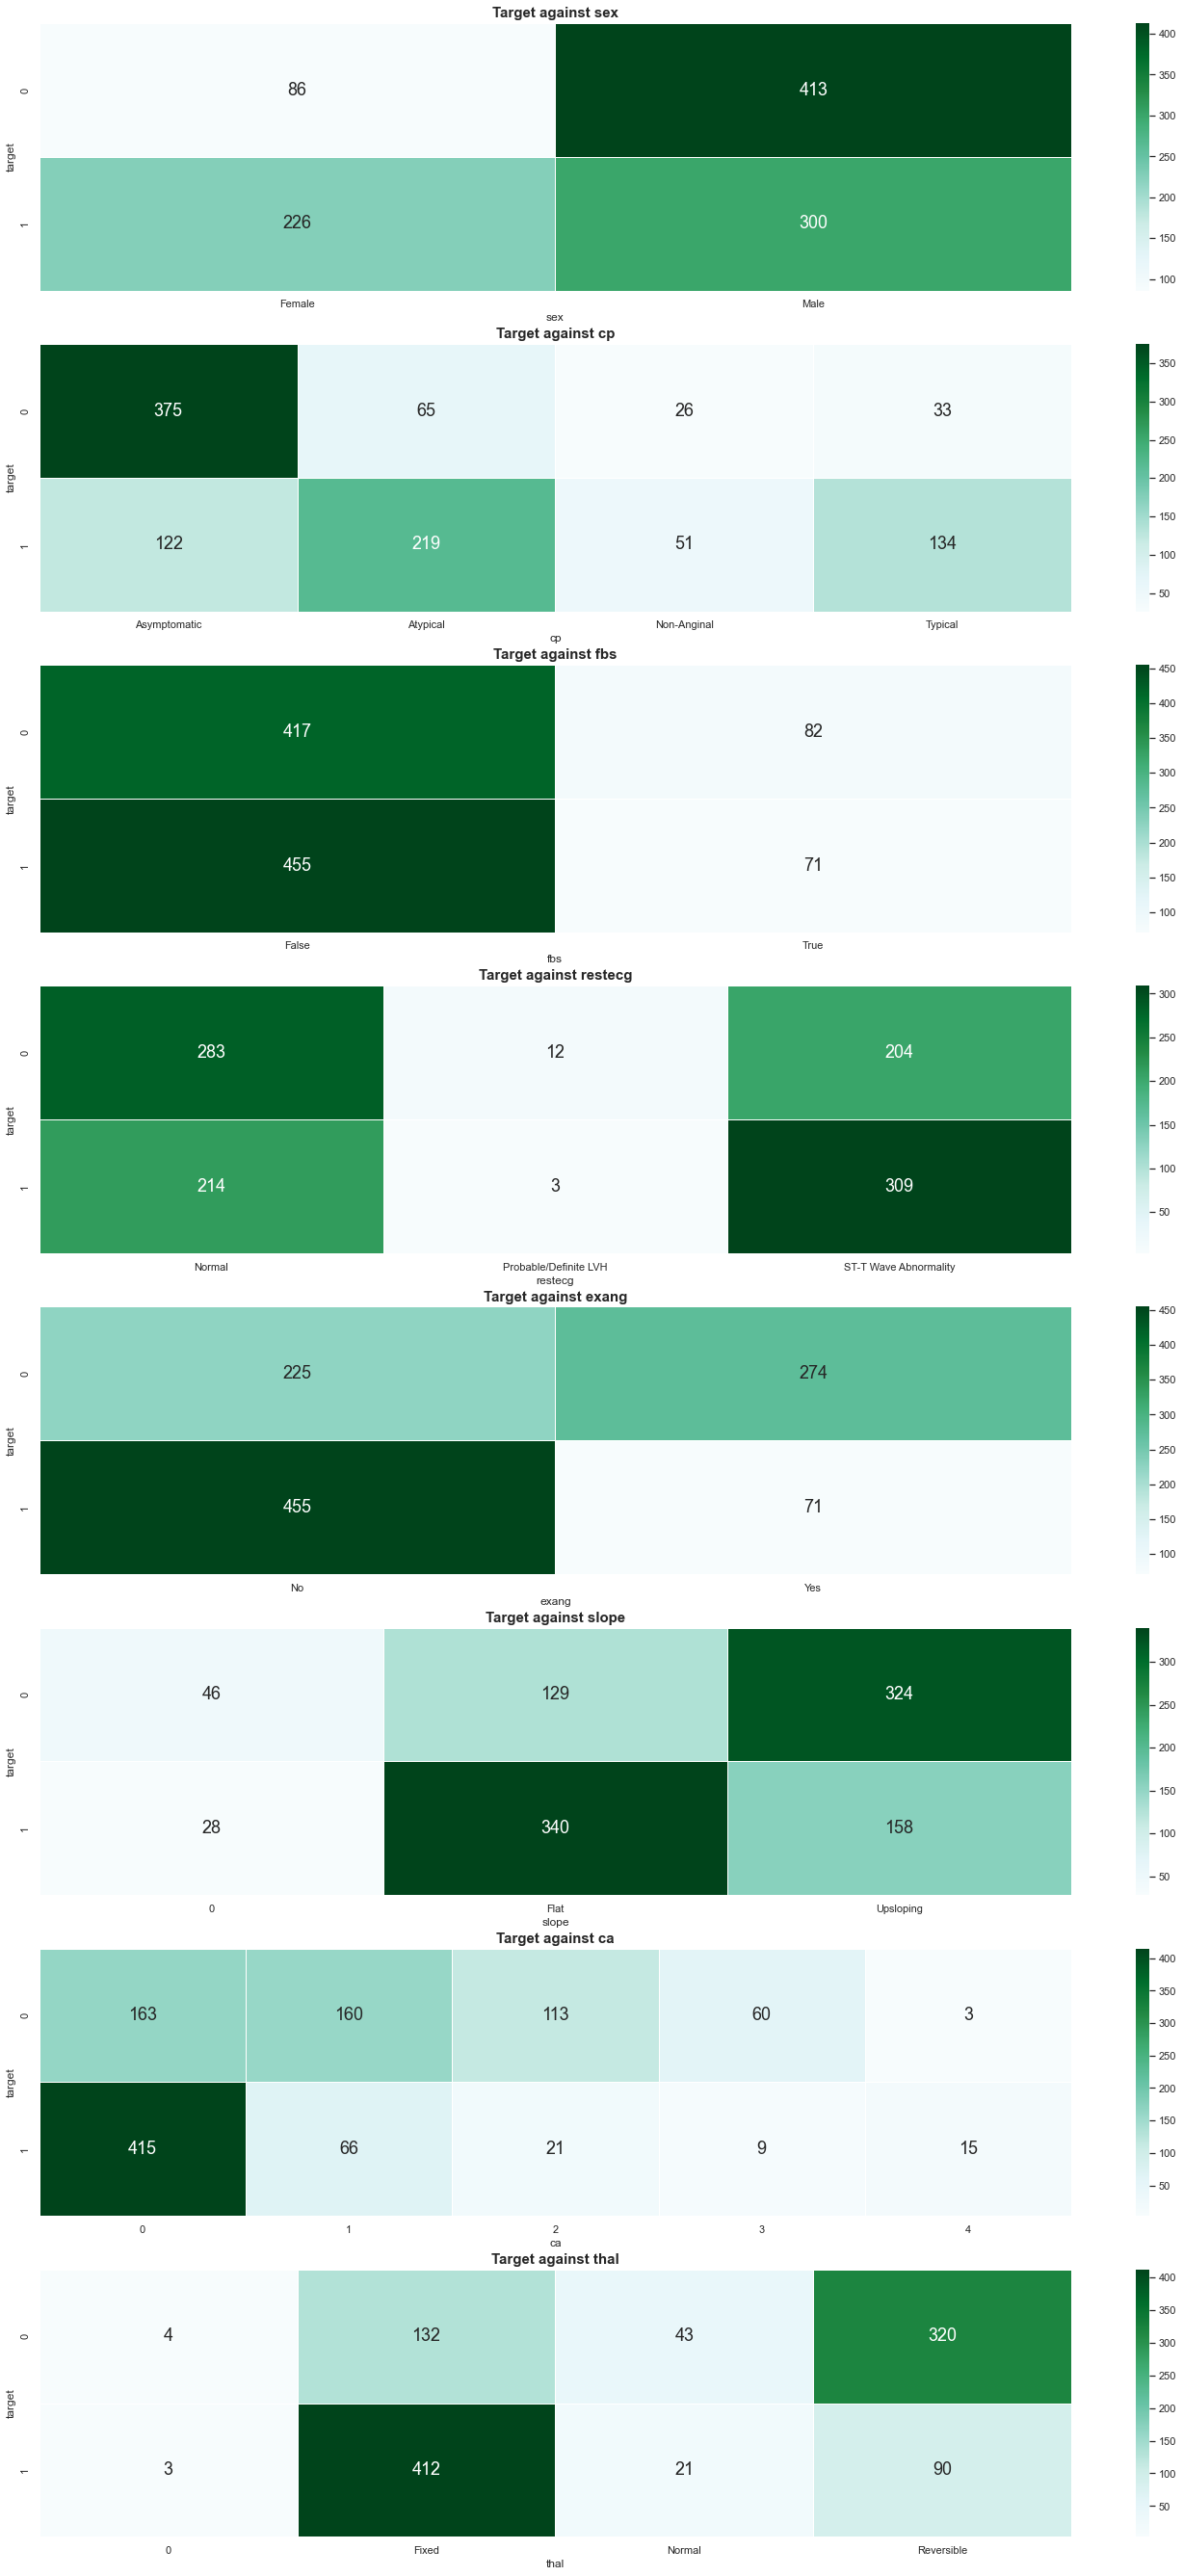

In [28]:
f, axes = plt.subplots(8, 1, figsize=(24, 48))

count = 0
for feature in cat_list:
    if feature == 'target': break;
    g = sb.heatmap(df_new.groupby(['target', feature]).size().unstack(),
                   linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax=axes[count])
    title = 'Target against ' + feature
    g.set_title(title, fontdict={'fontsize':15, 'fontweight':'bold'})
    count += 1

<h4>Correlation Matrix</h4>

<AxesSubplot:>

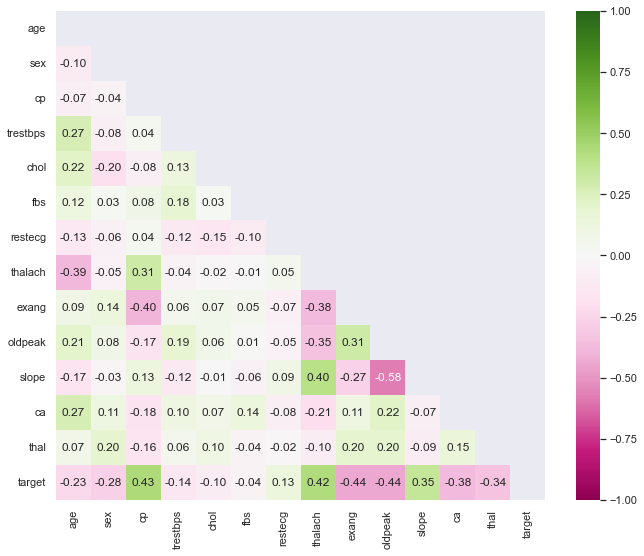

In [29]:
f, axes = plt.subplots(figsize=(11,9))

# use the original dataframe for the correlation matrix
# we want to know the correlation of the categorical variables with the response variable too
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sb.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, square=True, mask=mask, fmt='.2f', cmap='PiYG')

In [30]:
corr_list = df.corr()['target']
print('Correlation of Predictors w/ Response')
corr_list.sort_values(ascending=True)

Correlation of Predictors w/ Response


oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

insert observations about correlation coefficient here

<h2>Data Preprocessing</h2>

Through the observations produced from Exploratory Data Analysis, we have gained a better understanding of our data. But before embarking on predictive modeling, we first need to clean and preprocess the data.

<h3>Preliminary Feature Selection</h3>

First, we ask ourselves the question: which predictors may be useful in helping us predict the response variable `target`? And which are not?

It helps to know the origin of the dataset. The heart disease dataset dates from 1988 and consists of four databases containing 76 attributes each. However, we observe that only 14 attributes (`target` included) are included in this dataset. 

According to Kaggle, while the original dataset contained 76 attributes, all published experiments refer to using a subset of only our current 14 attributes. This implies that, in a medical setting, these 13 predictors may have been highly relevant for diagnosing heart disease. 

As we're still in the preliminary stage, we will keep all 13 predictors for now. We may choose to drop predictors accordingly based on their classification accuracy once a classifier model has been trained later on.

<b>ALTERNATIVELY: USING NEW DATASET</b>

New question: Can we diagnose severity of heart disease based on medical test data?

1. drop `thal` because more than half of the values missing -> not a useful predictor
2. resample gender: male (79%) and female (21%) imbalance

what can be done?
1. is it important to know the exact age? how about an age range?
2. oldpeak and slope: related, can we combine?

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<h3>Data Cleaning</h3>

From our observations on the predictor `thal`, there appears to be a class `0` which is not mentioned in the description of the dataset.

In [33]:
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

There are seven instances of `thal = 0`. These are the samples where `thal` was not recorded, and therefore it is MNAR (Missing Not As Random). ~As these samples will not contribute meaningfully to the predictive quality of the model, these observations with `thal = 0` will be removed.~ We will replace these missing values with the <b>mode</b> `thal = 2`.

In [36]:
#df_new = df[df.thal != 0
df.loc[df['thal'] == 0, 'thal'] = 2
df['thal'].value_counts()

2    551
3    410
1     64
Name: thal, dtype: int64

From our observations on the predictor `ca`, there appears to be a class `4` which is not mentioned in the description of the dataset.

In [37]:
df['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

There are 18 instances of `ca = 4`, which account for approximately 1% of the samples. We  do not wish to make any assumptions on the meaning of `ca = 4`. As the effect of these observations on the predictive quality of the model will be minimal at best, these observations with `ca = 4` will be removed. 

In [ ]:
df_new = df_new[df_new.ca != 4]
df_new.shape

<h3>One-Hot Encoding</h3>

In [ ]:
df_new = pd.get_dummies(df_new, columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])
df_new.head(10)

In [ ]:
df_new.info()

<h3>Data Normalization</h3>

<h3>Univariate Analysis</h3>

First, we will perform EDA on the response variable `target`.

In [ ]:
sb.catplot(y = 'target', data = df, kind = 'count')

In [ ]:
countHD, countNHD = df['target'].value_counts()
print('% w/ Heart Disease: {:.0%}'.format(countHD/(countHD+countNHD)))
print('% w/o Heart Disease: {:.0%}'.format(countNHD/(countHD+countNHD)))

We see that the class imbalance for the response variable `target` is minimal (imbalanced by 1%), such that the two classes are virtually balanced. Thus there is no need to resample the data to balance the classes.

Now we will perform data exploration on the nominal categorical variables. First, we will create a new dataframe with renamed categories.

In [ ]:
df_cat = pd.DataFrame(df[cat_list])
df_cat.head()

We will change the values of each feature based on the description of the dataset.

In [ ]:
dict1 = {'sex': {0: 'Female', 1: 'Male'}, 
        'cp': {0: 'Asymptomatic', 1: 'Typical', 2: 'Atypical', 3: 'Non-Anginal'}, 
        'fbs': {0: 'False', 1: 'True'}, 
        'restecg': {0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Probable/Definite LVH'},
        'exang': {0: 'No', 1: 'Yes'},
        'slope': {1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}, 
        'ca': {0: 0, 1: 1, 2: 2, 3: 3},
        'thal': {1: 'Normal', 2: 'Fixed', 3: 'Reversible'}}

for i in dict1:
    df_cat = df_cat.replace({i: dict1[i]})

In [ ]:
df_cat.head()

In [ ]:
count = 0
for i in df_cat:
    if i == 'target': break;
    g = sb.catplot(y = i, data = df_cat, kind='count')
    count+=1

<h3>Bivariate Analysis</h3>

relationship b/w variables
* continuous against target
* discrete against target

In [ ]:
f, axes = plt.subplots(8, 1, figsize=(24,96))

count = 0
for i in df_cat:
    if i == 'target': break;
    g = sb.countplot(x = i, data = df_cat, hue = 'target', ax=axes[count])
    g.set_title(i, fontdict={'fontsize':15, 'fontweight':'bold'})
    count+=1

<h3>Multivariate Analysis</h3>

relationship b/w variables
* continuous against target
* discrete against target

<h2>Data Preprocessing</h2>
insert bs about data preprocessing here

<h3>One-Hot Encoding</h3>